In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 【問題1】データの取得

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(data.target, columns=['Species'])

In [3]:
X[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y[:5]

,Species
0,0
1,0
2,0
3,0
4,0


## 【問題2】データの結合

In [5]:
df = pd.concat([X, y], axis=1)

## 【問題3】データの確認

In [6]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。
df[:4]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


各特徴量は小数点以下1桁の浮動小数点数である。

In [7]:
# ラベルごとのサンプル数の合計を出力する。
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

各ラベルのサンプル数は50である。

In [8]:
# 特徴量に欠損値があるかを確認する。
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
Species         False
dtype: bool

データに欠損値は含まれない。

In [9]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【問題4】irisデータセット自体の調査

元々のデータ収集は Edgar Anderson 氏が行っているため、「Anderson's Iris dataset（アンダーソンのあやめデータセット）」と呼ばれることもある。

## 【問題5】必要なデータを抽出

In [10]:
# sepal_widthの列を3つの異なる方法で抽出する
display(df['sepal_width'])
display(df.sepal_width)
display(df.loc[:, 'sepal_width'])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [11]:
# 50番目から99番目までのデータを抽出する
df[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [12]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df['petal_length'][50:100]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

In [13]:
# petal_widthの値が0.2のデータを抽出する
df.query('petal_width == 0.2')

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


**.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。**

`.loc` は行名や列名でデータを指定し、`iloc` は行番号や列番号でデータを指定する。

## 【問題6】図の作成

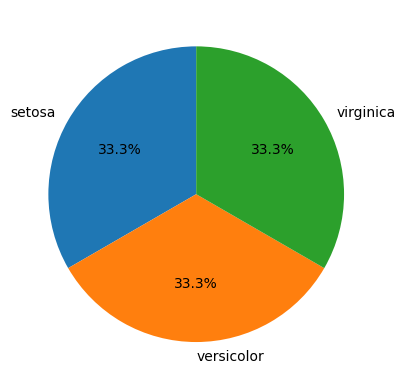

In [14]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
plt.pie(df['Species'].value_counts(), labels=data.target_names, startangle=90, autopct="%.1f%%")
plt.show()

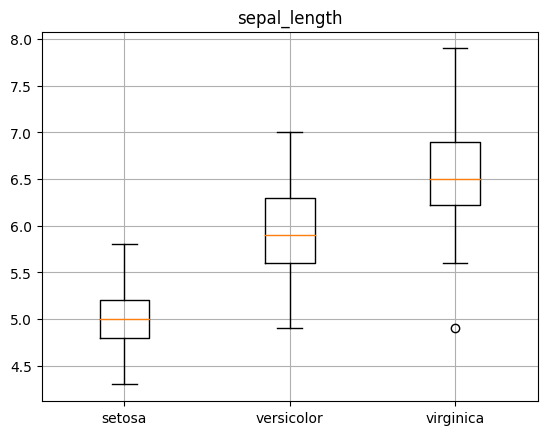

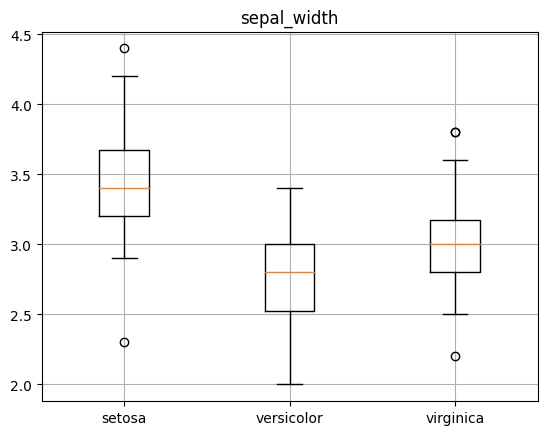

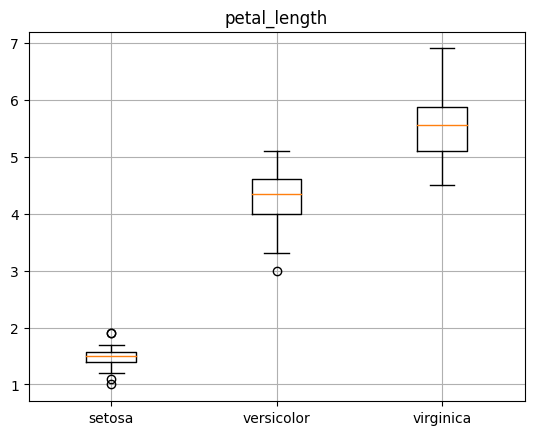

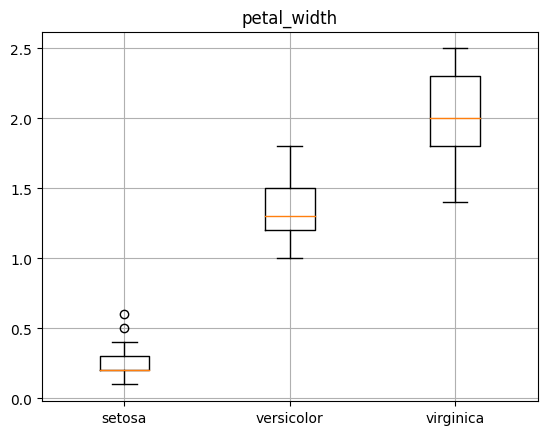

In [15]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

for col in df.columns[:-1]:
    fig, ax = plt.subplots()
    ax.boxplot([df.query(f'Species == {i}')[col] for i in df['Species'].unique()])
    ax.set_xticklabels(data.target_names)
    ax.grid()
    plt.title(col)
    plt.show()

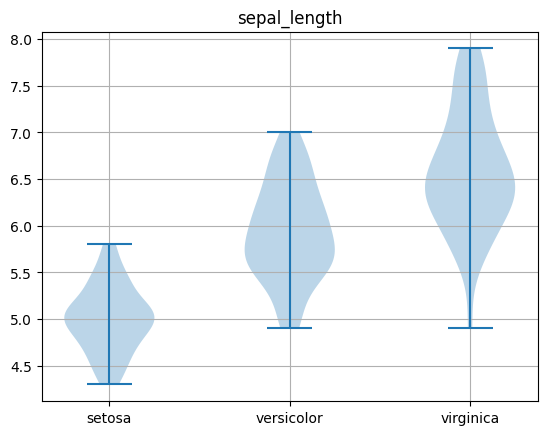

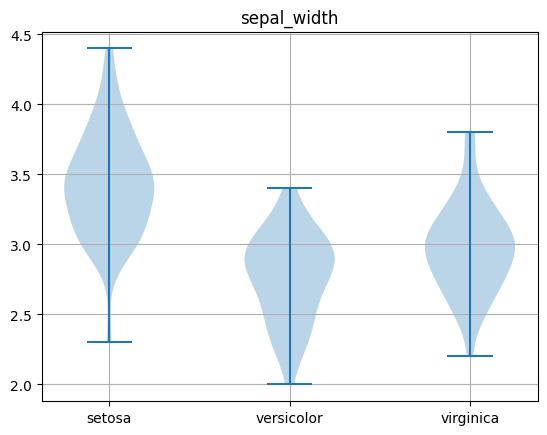

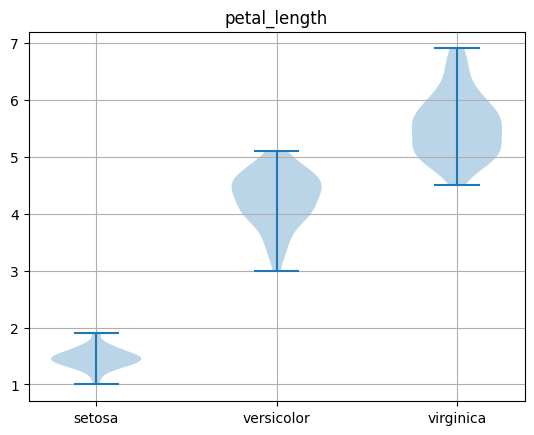

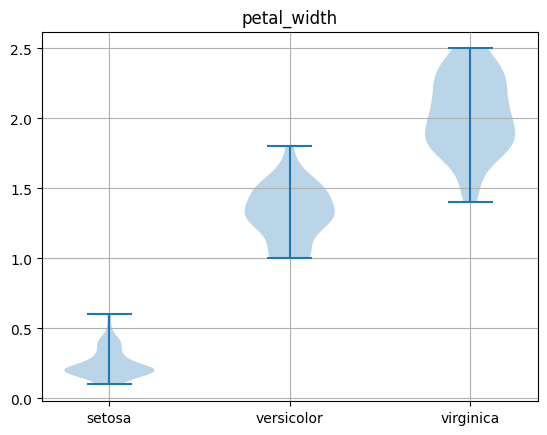

In [16]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

for col in df.columns[:-1]:
    plt.violinplot([df.query(f'Species == {i}')[col] for i in df['Species'].unique()])
    plt.xticks([1, 2, 3], data.target_names)
    plt.grid()
    plt.title(col)
    plt.show()

**箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。**

箱ひげ図は四分位数などの要約統計量が分かりやすいという利点があり、バイオリン図は複数のピークがあるような複雑な分布を図示できるという利点がある。

## 【問題7】特徴量間の関係の確認

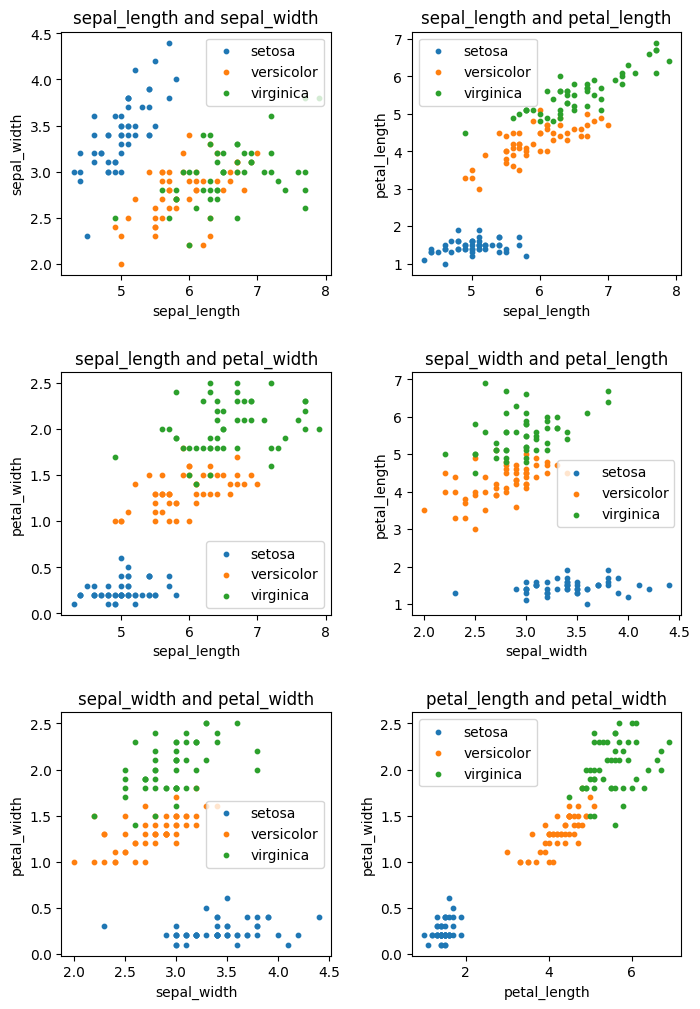

In [17]:
# ４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。

import itertools
features = itertools.combinations(df.columns[:-1], 2)

h, w = 3, 2
fig, axes = plt.subplots(h, w, figsize=(8, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i, feature in enumerate(features):
    for label in df['Species'].unique():
        axes[i//w, i%w].scatter(df[df['Species'] == label][feature[0]],
                                df[df['Species'] == label][feature[1]],
                                s=10, label=data.target_names[label])
    axes[i//w, i%w].set_title(f'{feature[0]} and {feature[1]}')
    axes[i//w, i%w].set(xlabel=feature[0], ylabel=feature[1])
    axes[i//w, i%w].legend()

plt.show()

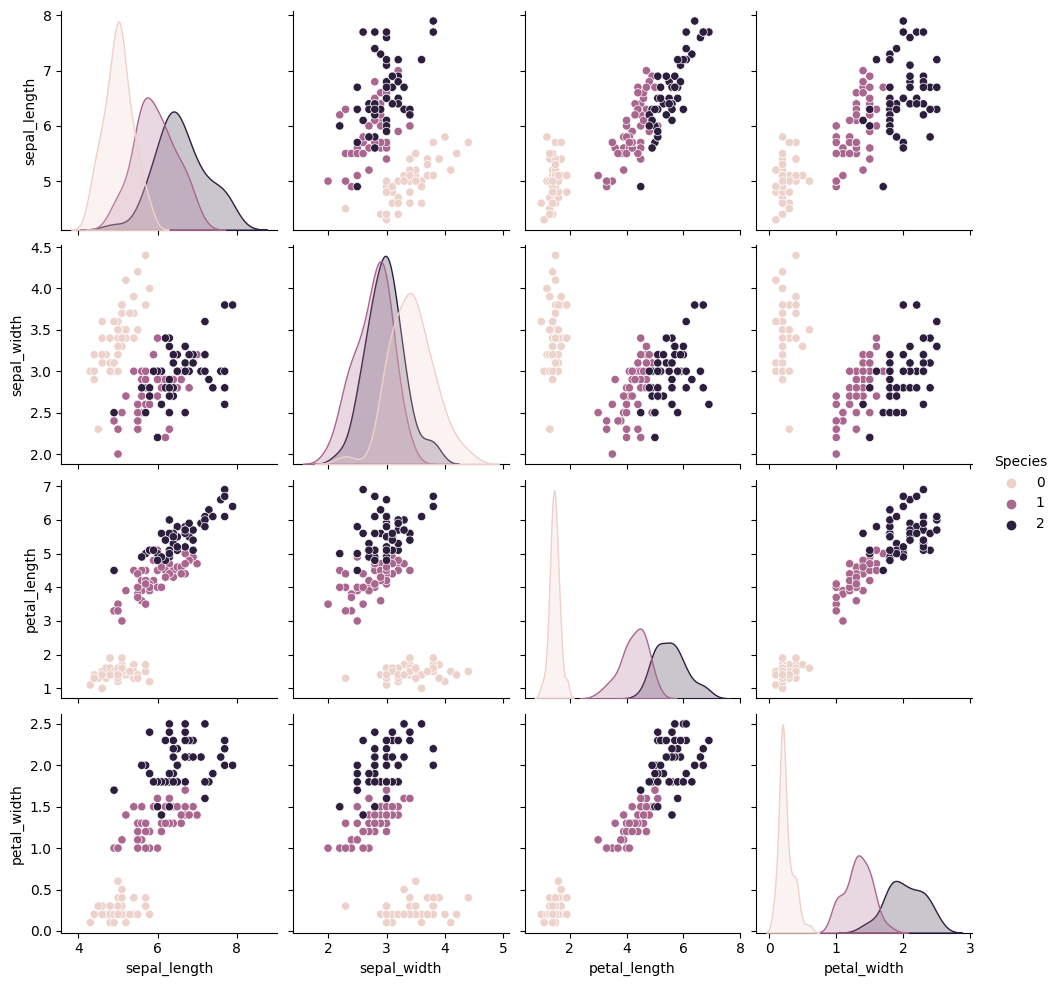

In [18]:
# すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。

import seaborn as sns

sns.pairplot(df, hue='Species')

In [19]:
# ４つの特徴量に関する相関係数行列を作る

df.iloc[:, :-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


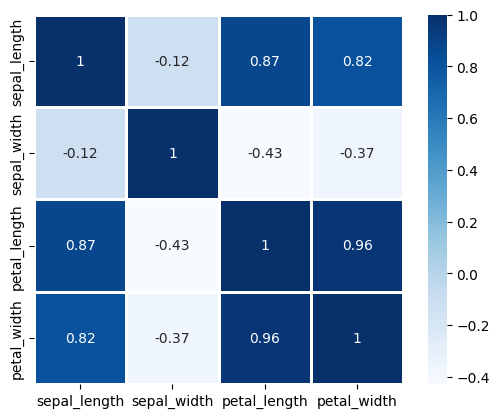

In [20]:
# 相関係数行列のヒートマップを作る(１つ)

sns.heatmap(df.iloc[:, :-1].corr(), square=True, annot=True, linewidths=1, cmap=plt.cm.Blues)
plt.show()

## 【問題8】可視化したグラフや表の結果の説明

散布図行列を見ると、versicolorとvirginicaは特徴量sepal_widthの分布が似ているため、他の特徴量で判別する必要があることが分かる。